In [13]:
%pylab inline
from octopus import shapes, orbit_cm
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [14]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [15]:
# Function to iterate over the radius of the halo
def iterate_volume(X, Y, Z, R, tol):
    s = np.zeros(len(R))
    q = np.zeros(len(R))
    for i in range(len(R)):
        s[i], q[i] = shapes.iterate_volume(X, Y, Z, R[i], tol)
    return s, q

time 000
Returning DM    Positions
3.0 (2.97796650915+0j) (2.95512823561+0j)
11.1020408163 (11.0454456979+0j) (10.9759364163+0j)
19.2040816327 (19.1351350947+0j) (19.1232859928+0j)
27.306122449 (27.2037042463+0j) (27.1809511511+0j)
35.4081632653 (35.3578734651+0j) (35.2957062759+0j)
43.5102040816 (43.462586192+0j) (43.3577384769+0j)
51.612244898 (51.4940723092+0j) (51.4010141142+0j)
59.7142857143 (59.6038811786+0j) (59.4818753435+0j)
67.8163265306 (67.7011203593+0j) (67.5359290949+0j)
92.1224489796 (91.9445203853+0j) (91.8323843152+0j)
100.224489796 (100.013560678+0j) (99.9322492562+0j)
108.326530612 (108.187876571+0j) (108.152490488+0j)
132.632653061 (132.449530711+0j) (132.336603558+0j)
140.734693878 (140.546730252+0j) (140.455010462+0j)
148.836734694 (148.680016661+0j) (148.429785918+0j)
156.93877551 (156.705140099+0j) (156.571944422+0j)
165.040816327 (164.77822787+0j) (164.638877652+0j)
173.142857143 (172.948221478+0j) (172.87498021+0j)
181.244897959 (180.992547319+0j) (180.8390352

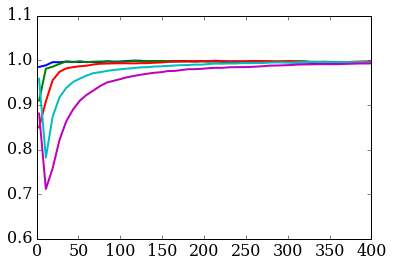

In [16]:
times_mw = [0, 10, 20, 30, 40]
N_mw = 50
r_mw = np.linspace(3, 400, N_mw)
for i in times_mw:
    print 'time {:0>3d}'.format(i)
    pos = readsnap(('../data/MW_models/pm/model2/MWN2vir_{:0>3d}.hdf5').format(i), 'pos', 'dm')  
    s, q = iterate_volume(pos[:,0], pos[:,1], pos[:,2], r_mw, 1E-3)
    plot(r_mw, s, lw=2.0)
    ylim(0.6, 1.1)
    savefig('MW_shape_time.png', bbox_inches='tight', dpi=300)

In [17]:
# Loading simulation data from N-body simulations
dm_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
dm_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
dm_ids_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

dm_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
dm_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
dm_ids_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

# Loading data of isolated MW:
mw_pos_i = readsnap('../data/MW_models/pm/model2/MWN2vir_000.hdf5', 'pos', 'dm')
mw_pos_f = readsnap('../data/MW_models/pm/model2/MWN2vir_014.hdf5', 'pos', 'dm')

# MW dif res
mw2_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2_2M_010', 'pos', 'dm')
mw4_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2_4M_010', 'pos', 'dm')
mw10_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2_10M_010', 'pos', 'dm')
mw30_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2UHRvir_000.hdf5', 'pos', 'dm')


Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions


In [18]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    return xyz[index_mw], vxyz[index_mw]

In [19]:
mw_pos_i, mw_vel_i = mw_particles(dm_pos_i, dm_vel_i, dm_ids_i, 1000000)
mw_pos_f, mw_vel_f = mw_particles(dm_pos_f, dm_vel_f, dm_ids_f, 1000000)

In [20]:
# Computing the CM
xcm_i, ycm_i, zcm_i, vx_cmi, vy_cmi, vz_cmi = orbit_cm.CM(mw_pos_i, mw_vel_i)
xcm_f, ycm_f, zcm_f, vx_cmf, vy_cmf, vz_cmf = orbit_cm.CM(mw_pos_f, mw_vel_f)

In [21]:
print xcm_i, ycm_i, zcm_i
print xcm_f, ycm_f, zcm_f

0.0326767973748 -0.0160168181304 -0.025037442445
3.14213492468 33.1085245965 -10.5106429199


In [22]:
N_r = 200
r = np.linspace(3, 400, N_r)

# Different resolutions of ther MW
q_mw1_v = np.zeros(N_r)
s_mw1_v = np.zeros(N_r)

q_mw2_v = np.zeros(N_r)
s_mw2_v = np.zeros(N_r)

q_mw4_v = np.zeros(N_r)
s_mw4_v = np.zeros(N_r)

q_mw10_v = np.zeros(N_r)
s_mw10_v = np.zeros(N_r)

q_mw30_v = np.zeros(N_r)
s_mw30_v = np.zeros(N_r)

# LMC

q_mw_v_i = np.zeros(N_r)
s_mw_v_i = np.zeros(N_r)

q_mw_v_f = np.zeros(N_r)
s_mw_v_f = np.zeros(N_r)


q_mwlmc_v_i = np.zeros(N_r)
s_mwlmc_v_i = np.zeros(N_r)

q_mwlmc_v_f = np.zeros(N_r)
s_mwlmc_v_f = np.zeros(N_r)

# MW evolving in time

# MW-LMC evolving in time

In [27]:
for i in range(len(r)):
    s_mw_v_i[i], q_mw_v_i[i] = shapes.iterate_volume(mw_pos_i[:,0]-xcm_i, mw_pos_i[:,1]-ycm_i, mw_pos_i[:,2]-zcm_i, r[i], 1E-3)
    s_mw_v_f[i], q_mw_v_f[i] = shapes.iterate_volume(mw_pos_f[:,0]-xcm_f, mw_pos_f[:,1]-ycm_f, mw_pos_f[:,2]-zcm_f, r[i], 1E-3)
    if i%10==0:
        print 'done', i

3.0 (2.97814151332+0j) (2.95131208757+0j)
3.0 (2.93457912313+0j) (2.88607720244+0j)
done 0
4.99497487437 (4.95561245795+0j) (4.92724809783+0j)
4.99497487437 (4.92980545729+0j) (4.79049517826+0j)
6.98994974874 (6.96817860498+0j) (6.88561186253+0j)
6.98994974874 (6.8940859133+0j) (6.77980020675+0j)
8.98492462312 (8.9151400833+0j) (8.86451816241+0j)
8.98492462312 (8.8464419644+0j) (8.77132713217+0j)
10.9798994975 (10.9358772677+0j) (10.8787556281+0j)
10.9798994975 (10.898256531+0j) (10.7909196294+0j)
12.9748743719 (12.9246690837+0j) (12.868960178+0j)
12.9748743719 (12.8429448471+0j) (12.8163733025+0j)
14.9698492462 (14.8270933433+0j) (14.806578681+0j)
14.9698492462 (14.8503065302+0j) (14.8086673517+0j)
16.9648241206 (16.8970046655+0j) (16.8088901862+0j)
16.9648241206 (16.8754584703+0j) (16.8427234405+0j)
18.959798995 (18.9261220314+0j) (18.8641572829+0j)
18.959798995 (18.8356648711+0j) (18.8167770958+0j)
20.9547738693 (20.9041323872+0j) (20.8814637581+0j)
20.9547738693 (20.8466802022+0j) 

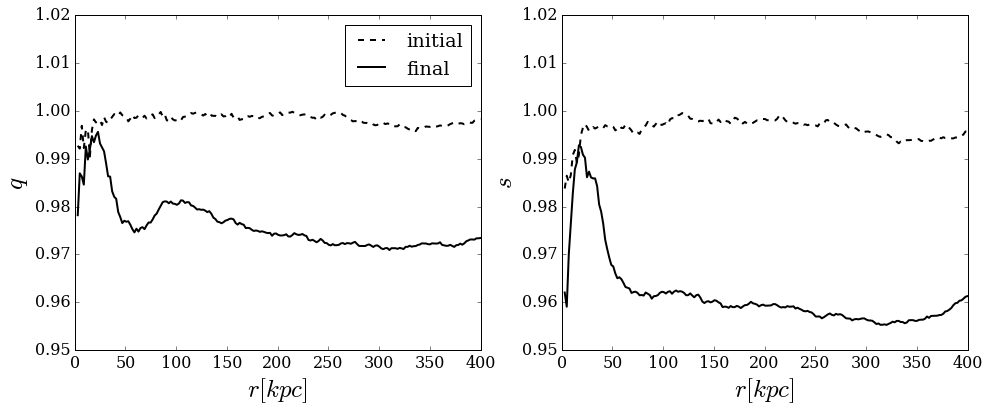

In [120]:
figure=(figsize(16,6))
subplot(1, 2, 1)
plot(r, q_mw_v_i, ls='--', c='k', lw=2.0, label='initial')
plot(r, q_mw_v_f, ls='-', c='k', lw=2.0, label='final')
ylabel('$q$', fontsize=25)
xlabel('$r[kpc]$', fontsize=25)
ylim([0.95, 1.02])
legend(loc='best')

subplot(1, 2, 2)
plot(r, s_mw_v_i, ls='--', c='k', lw=2.0)
plot(r, s_mw_v_f, ls='-', c='k', lw=2.0)
xlabel('$r[kpc]$', fontsize=25)
ylabel('$s$', fontsize=25)
ylim([0.95, 1.02])


savefig('shape_MW.eps', bbox_inches='tight', dpi=300)

In [124]:
T_MW_i = (np.ones(len(s_mw_v_i)) - q_mw_v_i**2.0)/(np.ones(len(s_mw_v_i)) - s_mw_v_i**2.0)
T_MW_f = (np.ones(len(s_mw_v_f)) - q_mw_v_f**2.0)/(np.ones(len(s_mw_v_f)) - s_mw_v_f**2.0)

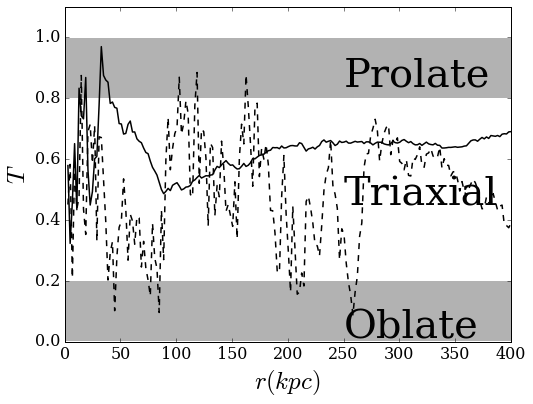

In [126]:
figure=(figsize(8,6))
plot(r, T_MW_i, ls='--', c='k', lw=1.5)
plot(r, T_MW_f, c='k', lw=1.5)
ylim(0, 1.1)
axhline(0.9, lw=60, alpha=0.3, c='k')
axhline(0.1, lw=60, alpha=0.3, c='k')
text(250, 0.84, 'Prolate', fontsize=40)
text(250, 0.01, 'Oblate', fontsize=40)
text(250, 0.45, 'Triaxial', fontsize=40)

xlabel('$r(kpc)$', fontsize=25)
ylabel('$T$', fontsize=25)
savefig('Triaxial_parameter_MW.eps', bbox_inches='tight', dpi=300)

time 000
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
cm coordinates:  0.0326767973748 -0.0160168181304 -0.025037442445
3.0 (2.97814151332+0j) (2.95131208757+0j)
11.1020408163 (11.0476646879+0j) (10.9872844838+0j)
19.2040816327 (19.1389252098+0j) (19.1221389075+0j)
27.306122449 (27.2033844031+0j) (27.1821917814+0j)
35.4081632653 (35.3567008149+0j) (35.2881862241+0j)
51.612244898 (51.4897094851+0j) (51.4016075413+0j)
59.7142857143 (59.5998658629+0j) (59.4786973073+0j)
67.8163265306 (67.7091419413+0j) (67.5470096513+0j)
92.1224489796 (91.9492592907+0j) (91.8314039009+0j)
100.224489796 (100.006539078+0j) (99.9224192489+0j)
108.326530612 (108.190257629+0j) (108.15505558+0j)
132.632653061 (132.439684576+0j) (132.335665664+0j)
140.734693878 (140.553258588+0j) (140.452204088+0j)
156.93877551 (156.703169126+0j) (156.571670397+0j)
165.040816327 (164.786726188+0j) (164.646738799+0j)
173.142857143 (172.934072663+0j) (172.874373619+0j)
181.244897959 (180.996525

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


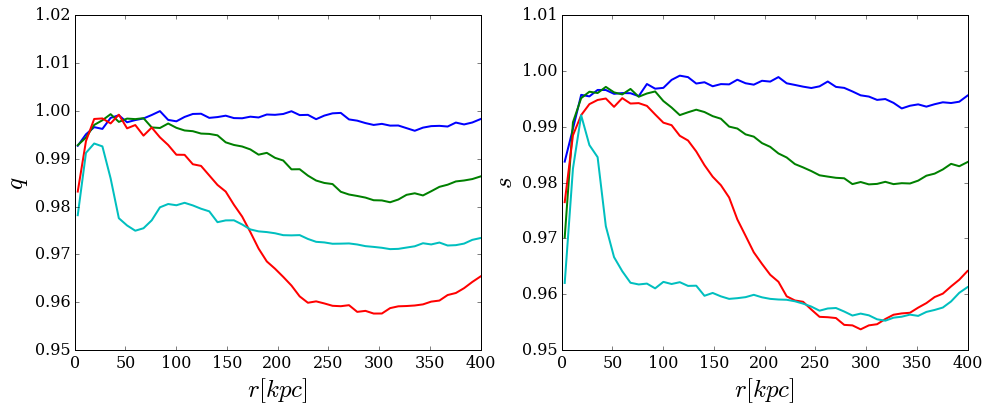

In [24]:
times_mwlmc = [0, 40, 80, 119]
k = 0
N_mw = 50
r_mw = np.linspace(3, 400, N_mw)
widths = [0.5, 1.5, 2.5, 3.5]
for i in times_mwlmc:
    print 'time {:0>3d}'.format(i)
    pos = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'pos', 'dm') 
    vel = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'vel', 'dm') 
    ids = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'pid', 'dm') 
    mw_pos, mw_vel = mw_particles(pos, vel, ids, 1000000)
    xcm, ycm, zcm, vxcm, vycm, vzcm = orbit_cm.CM(mw_pos, mw_vel)
    print 'cm coordinates: ', xcm, ycm, zcm
    s, q = iterate_volume(mw_pos[:,0]-xcm, mw_pos[:,1]-ycm, mw_pos[:,2]-zcm, r_mw, 1E-3)
    
    figure=(figsize(16,6))
    subplot(1, 2, 1)
    plot(r_mw, q, ls='-', lw=2.0)
    ylabel('$q$', fontsize=25)
    xlabel('$r[kpc]$', fontsize=25)
    ylim([0.95, 1.02])
    legend(loc='best')

    subplot(1, 2, 2)
    plot(r_mw, s, ls='-', lw=2.0)
    xlabel('$r[kpc]$', fontsize=25)
    ylabel('$s$', fontsize=25)
    ylim([0.95, 1.01])

    k=+1
    savefig('shape_MW_time.png', bbox_inches='tight')

In [38]:
# This one in computed from the outter regions to the inners
N_lmc = 200
r_lmc = np.linspace(3, 400, N_lmc)

for i in range(len(r_lmc)):
    q_mwlmc_v_i[i], s_mwlmc_v_i[i] = shapes.iterate_volume(dm_pos_i[:,0]-xcm_i, dm_pos_i[:,1]-ycm_i, dm_pos_i[:,2]-zcm_i, r_lmc[i], 1E-1)
    s_mwlmc_v_f[i], q_mwlmc_v_f[i] = shapes.iterate_volume(dm_pos_f[:,0]-xcm_f, dm_pos_f[:,1]-ycm_f, dm_pos_f[:,2]-zcm_f, r_lmc[i], 1E-1)
    if i%10==0:
        print 'done', i

done 0
done 10
40.9045226131 (36.0547213791+0j) (34.4416287325+0j)
42.8994974874 (36.8302088785+0j) (34.8894282109+0j)
done 20
44.8944723618 (37.3728951712+0j) (35.142398152+0j)
46.8894472362 (37.7165142353+0j) (35.1883064473+0j)
48.8844221106 (37.8658167969+0j) (35.0115848891+0j)
50.8793969849 (37.5916828482+0j) (34.5441602965+0j)
52.8743718593 (37.2135455787+0j) (33.9316938993+0j)
54.8693467337 (37.1605521544+0j) (33.6367447445+0j)
56.864321608 (37.6533967866+0j) (33.8792679938+0j)
58.8592964824 (38.4569740059+0j) (34.3855334078+0j)
60.8542713568 (39.600955528+0j) (35.1343099944+0j)
62.8492462312 (40.8867067663+0j) (36.0375362172+0j)
done 30
64.8442211055 (42.2806315762+0j) (37.0450175066+0j)
66.8391959799 (43.8086453706+0j) (38.1472774059+0j)
68.8341708543 (45.41815386+0j) (39.3121621347+0j)
70.8291457286 (47.1348737453+0j) (40.5925657492+0j)
72.824120603 (48.9419521834+0j) (41.9244895801+0j)
74.8190954774 (50.8341956598+0j) (43.3190045668+0j)
76.8140703518 (52.7474729084+0j) (44.71

In [72]:
T_f = (np.ones(N_lmc) - q_mwlmc_v_f**2.0) / (np.ones(N_lmc) - s_mwlmc_v_f**2.0)
T_i = (np.ones(N_lmc) - s_mwlmc_v_i**2.0) / (np.ones(N_lmc) - q_mwlmc_v_i**2.0) 
# this is inverted cause I call q, s wrong



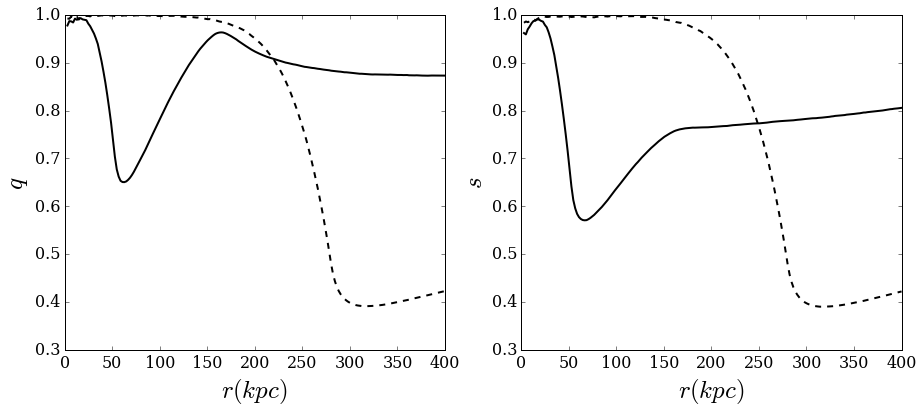

In [116]:
figure=(figsize(15,6))
subplot(1, 2, 1)
plot(r_lmc, q_mwlmc_v_f, c='k', lw=2.0)
plot(r_lmc, s_mwlmc_v_i, ls='--', c='k', lw=2.0)
xlabel('$r(kpc)$', fontsize=25)
ylabel('$q$', fontsize=25)
subplot(1, 2, 2)
plot(r_lmc, s_mwlmc_v_f, c='k', lw=2.0)
plot(r_lmc, q_mwlmc_v_i, ls='--', c='k', lw=2.0)
xlabel('$r(kpc)$', fontsize=25)
ylabel('$s$', fontsize=25)

#axhline(0.5, ls='--')
savefig('q_s_shells_MWLMC.eps', bbox_inches='tight', dpi=300)

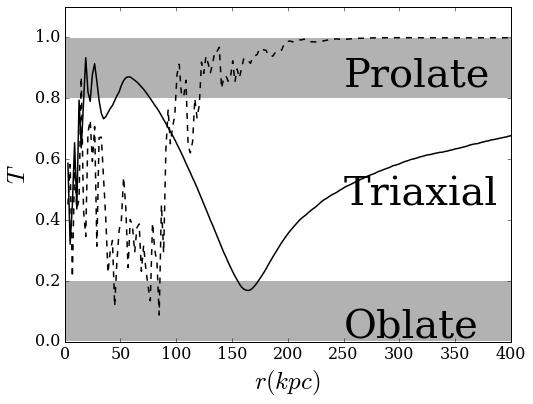

In [115]:
figure=(figsize(8,6))
plot(r_lmc, T_i, ls='--', c='k', lw=1.5)
plot(r_lmc, T_f, c='k', lw=1.5)
ylim(0, 1.1)
axhline(0.9, lw=60, alpha=0.3, c='k')
axhline(0.1, lw=60, alpha=0.3, c='k')
text(250, 0.84, 'Prolate', fontsize=40)
text(250, 0.01, 'Oblate', fontsize=40)
text(250, 0.45, 'Triaxial', fontsize=40)

xlabel('$r(kpc)$', fontsize=25)
ylabel('$T$', fontsize=25)
savefig('Triaxial_parameter_MWLMC.eps', bbox_inches='tight', dpi=300)

In [ ]:
# Finding shape of the MW:
N_r = 200
r = np.linspace(3, 400, N_r)

q_mw_s_i = np.zeros(int(N_r))
s_mw_s_i = np.zeros(int(N_r))
q_mw_v_i = np.zeros(int(N_r))
s_mw_v_i = np.zeros(int(N_r))


q_mw_s_f = np.zeros(int(N_r))
s_mw_s_f = np.zeros(int(N_r))
q_mw_v_f = np.zeros(int(N_r))
s_mw_v_f = np.zeros(int(N_r))

In [ ]:
for i in range(len(r)):
    s_mw_v_i[i], q_mw_v_i[i] = shapes.iterate_volume(mw_pos_i[:,0], mw_pos_i[:,1], mw_pos_i[:,2], r[i], 1E-1)
    s_mw_v_f[i], q_mw_v_f[i] = shapes.iterate_volume(mw_pos_f[:,0], mw_pos_f[:,1], mw_pos_f[:,2], r[i], 1E-1)

In [ ]:
for i in range(len(r)):
    s_mw_s_i[i], q_mw_s_i[i] = shapes.iterate_shell(mw_pos_i[:,0], mw_pos_i[:,1], mw_pos_i[:,2], r[i], 1.0, 1E-2)
    s_mw_s_f[i], q_mw_s_f[i] = shapes.iterate_shell(mw_pos_f[:,0], mw_pos_f[:,1], mw_pos_f[:,2], r[i], 1.0, 1E-2)

In [ ]:
plot(r, q_mw_s_i, ls='--', c='g')
plot(r, s_mw_s_i, ls='--', c='b', label='shells')

plot(r, s_mw_s_f, ls='-', c='g')
plot(r, q_mw_s_f, ls='-', c='b', label='spheres')

In [ ]:
plot(r, q_mw_v_i, ls='--', c='b')
plot(r, s_mw_v_i, ls='--', c='g', label='spheres')

plot(r, q_mw_v_f, ls='-', c='b')
plot(r, s_mw_v_f, ls='-', c='g', label='spheres')

In [15]:
for i in range(len(r)):
    s_mw1_v[i], q_mw1_v[i] = shapes.iterate_volume(mw1_pos_i[:,0], mw1_pos_i[:,1], mw1_pos_i[:,2], r[i], 1E-1)
    s_mw2_v[i], q_mw2_v[i] = shapes.iterate_volume(mw2_pos_i[:,0], mw2_pos_i[:,1], mw2_pos_i[:,2], r[i], 1E-1)
    s_mw4_v[i], q_mw4_v[i] = shapes.iterate_volume(mw4_pos_i[:,0], mw4_pos_i[:,1], mw4_pos_i[:,2], r[i], 1E-1)
    s_mw10_v[i], q_mw10_v[i] = shapes.iterate_volume(mw10_pos_i[:,0], mw10_pos_i[:,1], mw10_pos_i[:,2], r[i], 1E-1)
    s_mw30_v[i], q_mw30_v[i] = shapes.iterate_volume(mw30_pos_i[:,0], mw30_pos_i[:,1], mw30_pos_i[:,2], r[i], 1E-1)

NameError: name 'mw1_pos_i' is not defined

In [ ]:
figure(figsize=(19, 7))
subplot(1, 2, 1)
plot(r, q_mw2_v, ls='-', c='b', label='2M')

plot(r, q_mw4_v, ls='-', c='g', label='4M')

plot(r, q_mw10_v, ls='-', c='r', label='10M')

plot(r, q_mw30_v, ls='-', c='k',label='30M')

legend(loc='best')
ylim(0.9, 1.01)
plt.xlabel('$r$', fontsize=25)
plt.ylabel('$q$', fontsize=25)

subplot(1, 2, 2)
plot(r, s_mw2_v, ls='-', c='b')
plot(r, s_mw4_v, ls='-', c='g')
plot(r, s_mw10_v, ls='-', c='r')
plot(r, s_mw30_v, ls='-', c='k')

ylim(0.9, 1.01)
plt.xlabel('$r$', fontsize=25)
plt.ylabel('$s$', fontsize=25)

savefig('shapesMWdifres.png', bbox_inches='tight')
